# Sample data analysis
***

**Datas**: The images utilized in this project were obtained through the scanning of histological slide samples using a CZI format scanner, subsequently converted into JPG format. The dataset was generously provided by the Experimental Pathology Laboratory at the School of Medicine, PUC-PR.

**Objective of Analysis**: The primary objective is to categorize images as either "good" or "bad," aiding in the identification of suitable images for the subsequent cancer stage analysis.

In [9]:
# pip install opencv-python

In [22]:
try:
    from Codes.analysis_helper import plot_hist_rgb, plot_hist, show_image, get_path, get_hist
except ImportError:
    import os
    os.system('pip install -r requirements.txt')
    from Codes.analysis_helper import plot_hist_rgb, plot_hist, show_image, get_path, get_hist
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import cv2 as cv

plt.rcParams['figure.figsize'] = [5, 3]
'''
import cv2 as cv # Biblioteca OpenCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image # Biblioteca Pillow
'''

'\nimport cv2 as cv # Biblioteca OpenCV\nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom PIL import Image # Biblioteca Pillow\n'

In [2]:
# Metadata information
data = pd.read_csv('Tables/metadata.csv')
data.head()

Path                                   Name  Good  \
0  Images/1A.jpg_files/GOOD/  1A_s0c0x10661-1600y12949-1200m126.jpg     1   
1  Images/1A.jpg_files/GOOD/    1A_s0c0x10662-1600y9720-1200m95.jpg     1   
2  Images/1A.jpg_files/GOOD/  1A_s0c0x10663-1600y11874-1200m117.jpg     1   
3  Images/1A.jpg_files/GOOD/    1A_s0c0x10663-1600y5380-1200m47.jpg     1   
4  Images/1A.jpg_files/GOOD/    1A_s0c0x10664-1600y7547-1200m71.jpg     1   

       Bytes Folder Name   % White  
0  1224622.0          1A  0.072284  
1  1249531.0          1A  0.032418  
2  1230539.0          1A  0.037318  
3  1275787.0          1A  0.050985  
4  1260650.0          1A  0.076147

In [16]:
a = pd.DataFrame(columns=range(255))
a

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 255 columns]

In [17]:
# Selecting bad image metadata
data_bad = data.loc[data['Good']==0] 
data_bad.head()

Path                            Name  Good    Bytes  \
72  Images/1A.jpg_files/BAD/  1A_s0c0x0-740y3229-1200m15.jpg     0  20831.0   
73  Images/1A.jpg_files/BAD/  1A_s0c0x0-744y5380-1200m39.jpg     0  18783.0   
74  Images/1A.jpg_files/BAD/  1A_s0c0x0-745y8634-1200m75.jpg     0  26000.0   
75  Images/1A.jpg_files/BAD/  1A_s0c0x0-746y7545-1200m63.jpg     0  26530.0   
76  Images/1A.jpg_files/BAD/  1A_s0c0x0-746y9718-1200m87.jpg     0  19841.0   

   Folder Name   % White  
72          1A  0.461912  
73          1A  0.464693  
74          1A  0.464677  
75          1A  0.464657  
76          1A  0.465888

In [37]:
cv.calcHist(cv.imread(get_path(data,1),0))

error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'calcHist'
> Overload resolution failed:
>  - calcHist() missing required argument 'channels' (pos 2)
>  - calcHist() missing required argument 'channels' (pos 2)


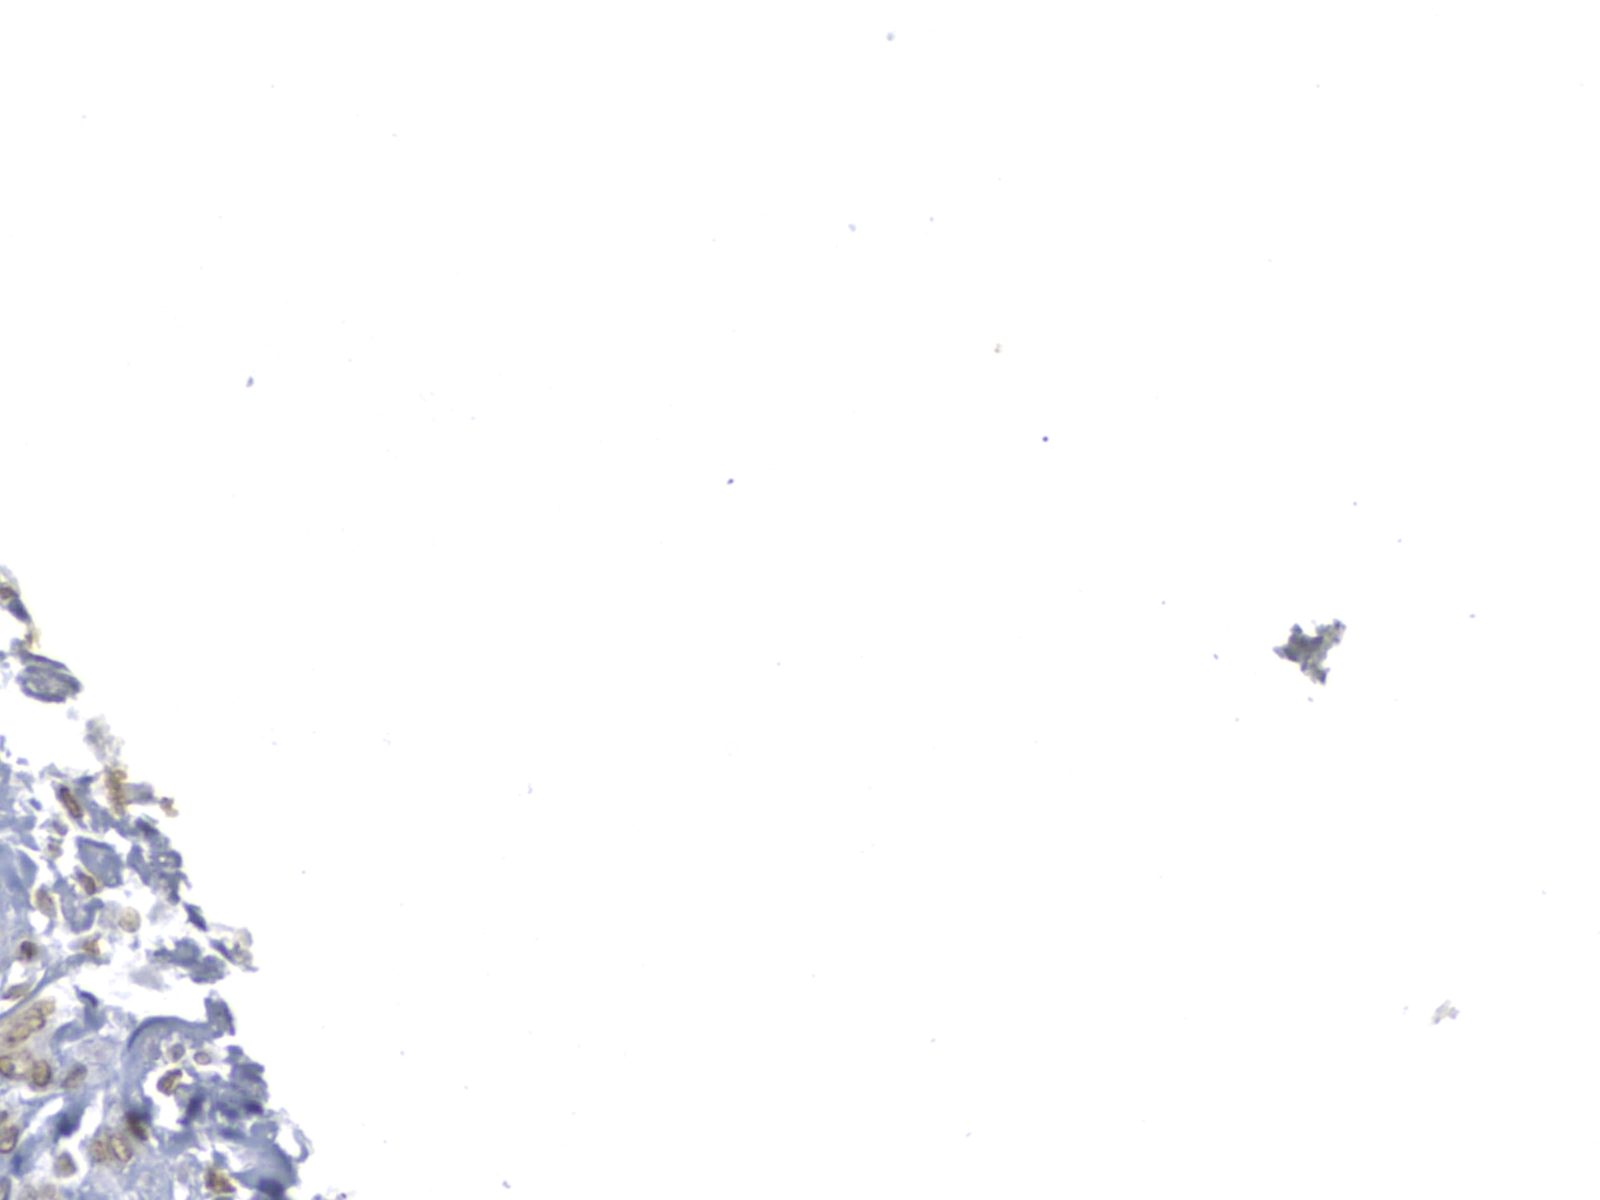

In [18]:
# Example of a bad image
im = Image.open(get_path(data_bad, 95)) # getting the 95th bad image from the data_bad table
im

AttributeError: Rectangle.set() got an unexpected keyword argument 'figsize'

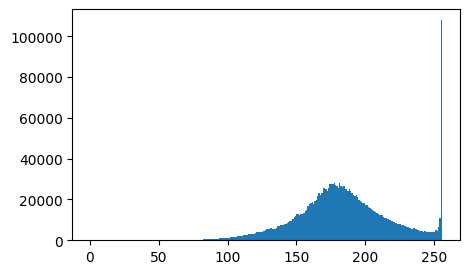

In [20]:
plot_hist(data, list(range(0,6)))

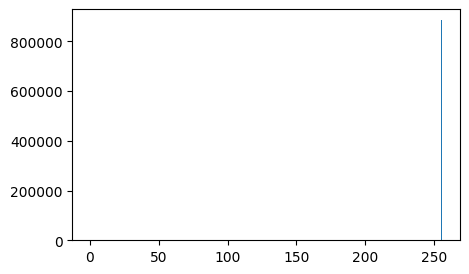

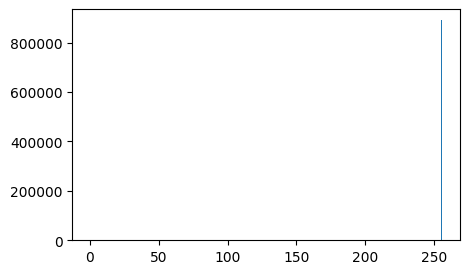

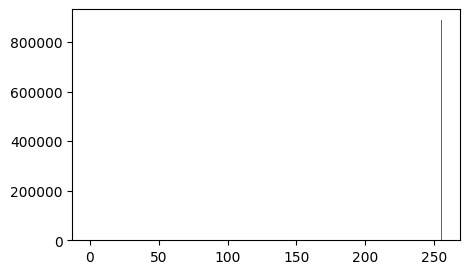

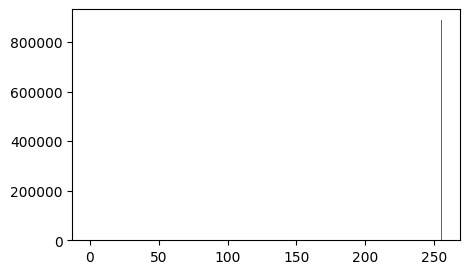

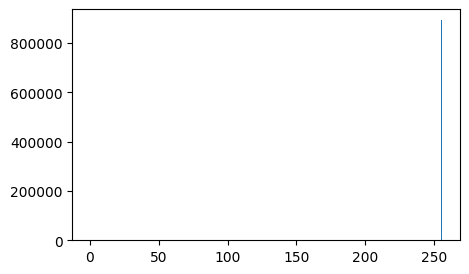

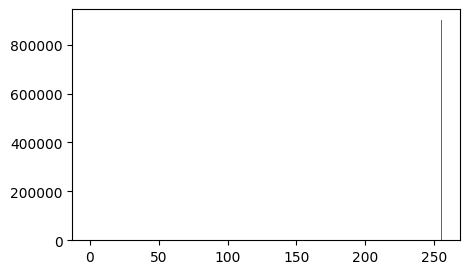

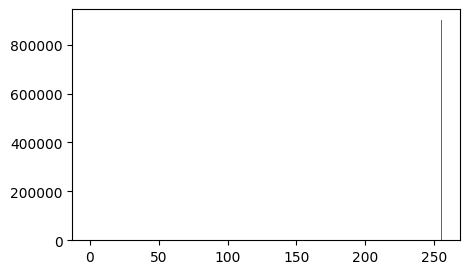

In [70]:
plot_hist(data_bad,list(range(72,79)))

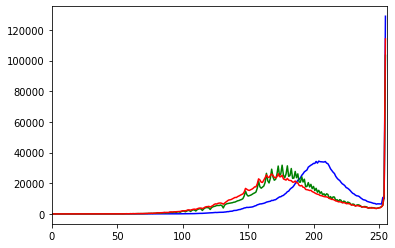

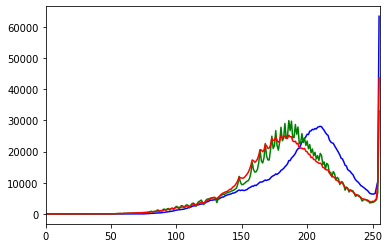

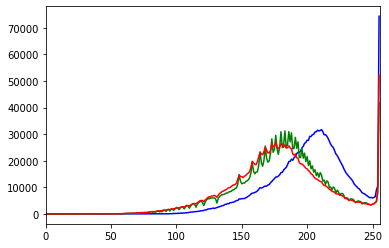

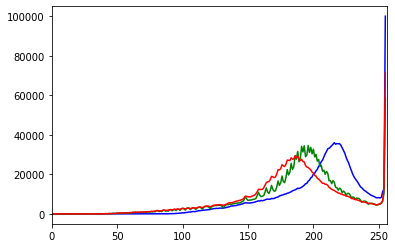

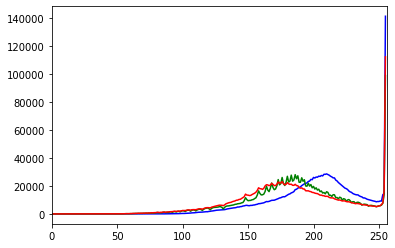

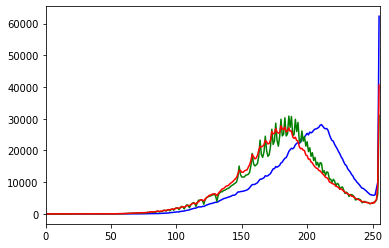

In [10]:
plot_hist_c(data,list(range(0,6)))

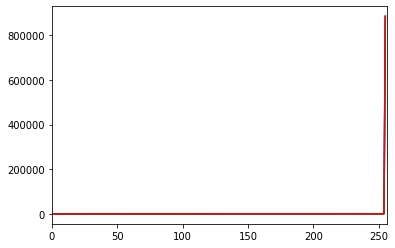

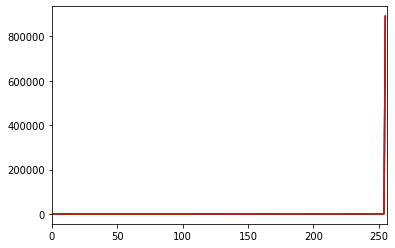

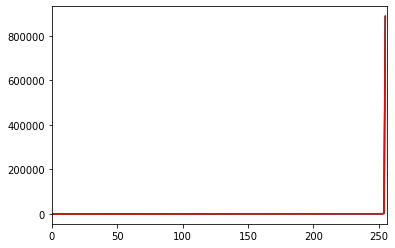

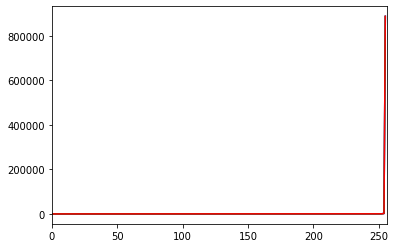

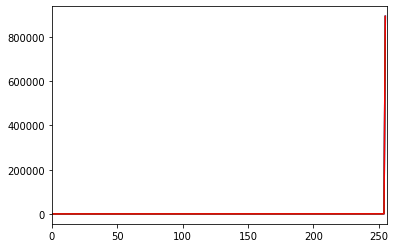

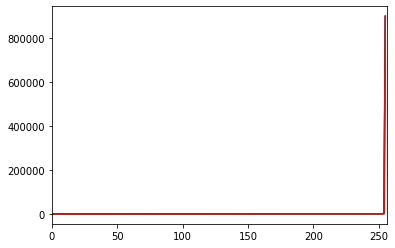

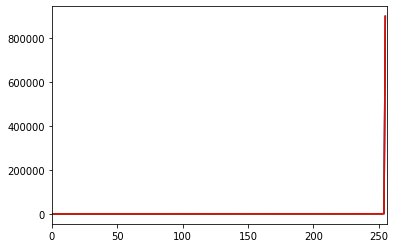

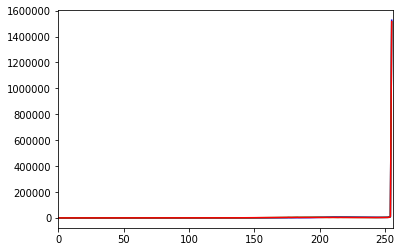

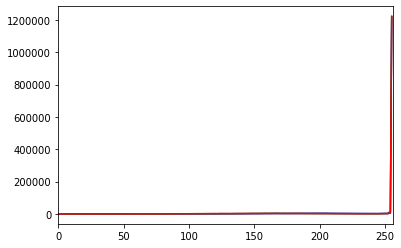

In [11]:
plot_hist_c(data_ruim, list(range(72,81)))

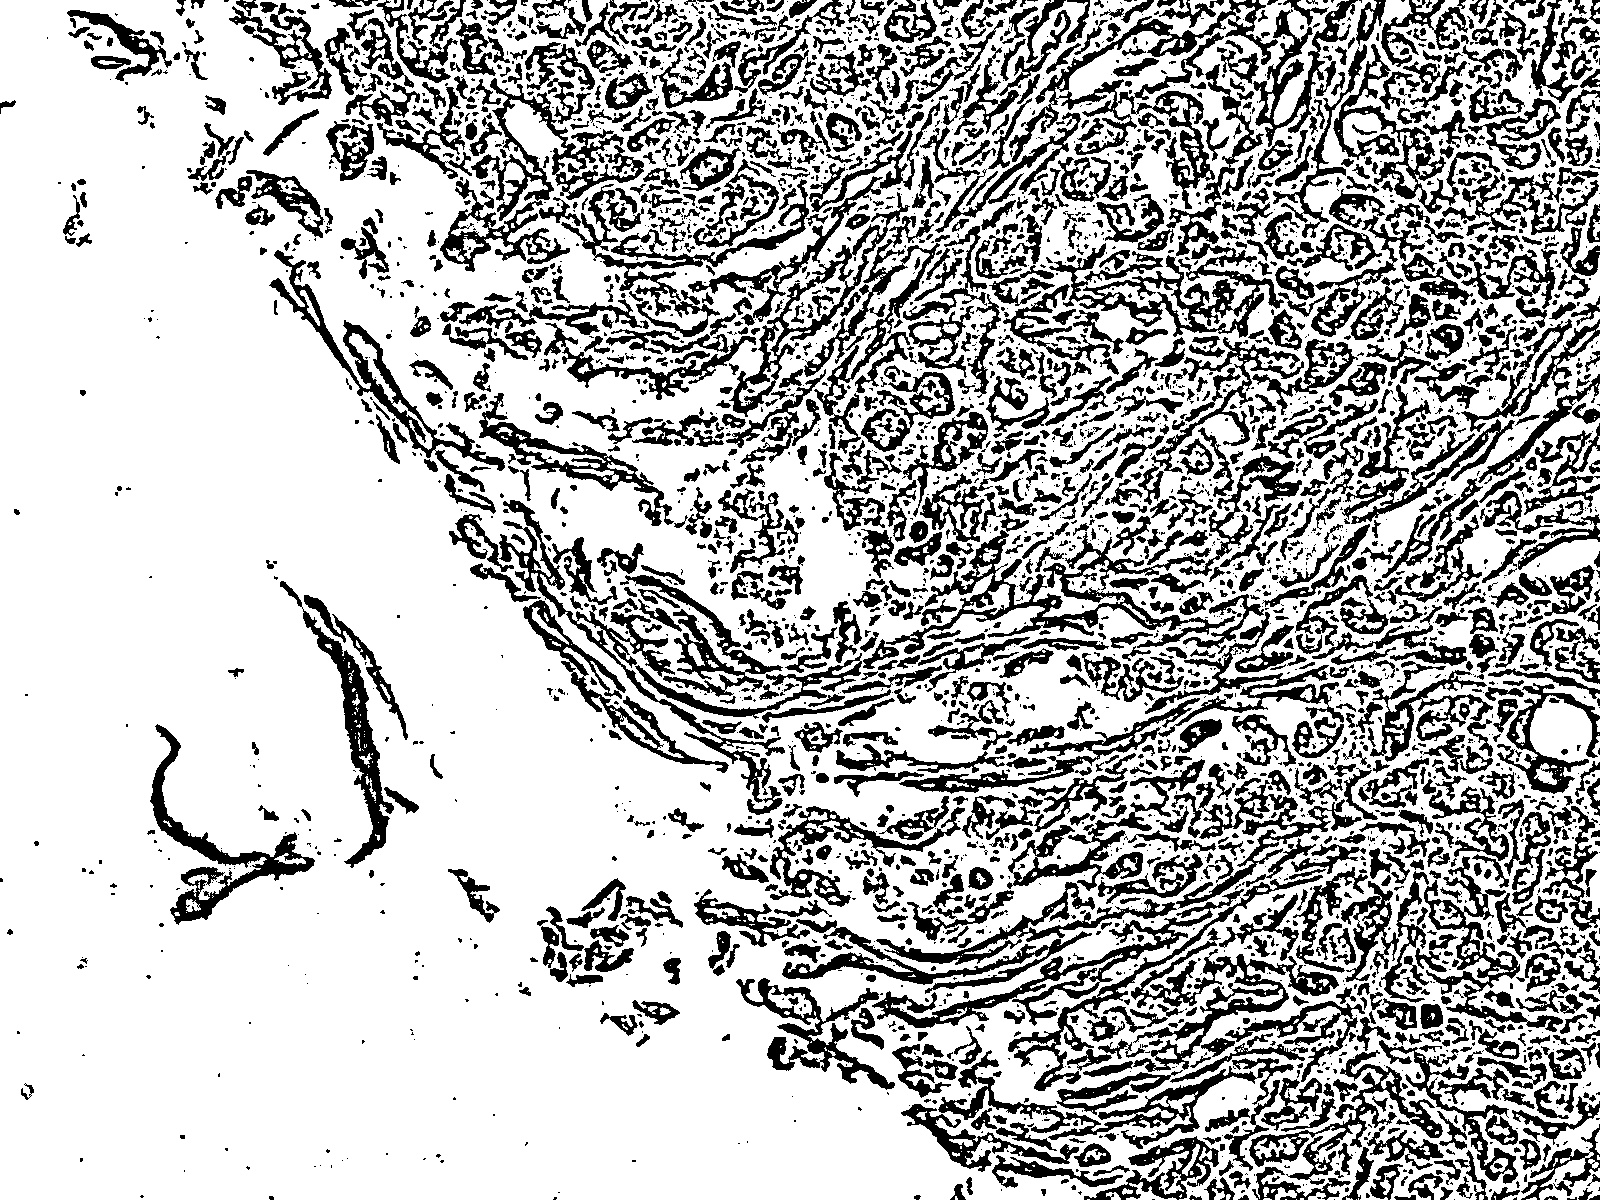

In [36]:
i = 100
img_path = get_path(data, i)
img = cv.imread(img_path, 0)
adp1 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 9, 2)
im = showimage('teste1.jpg', adp1)
im

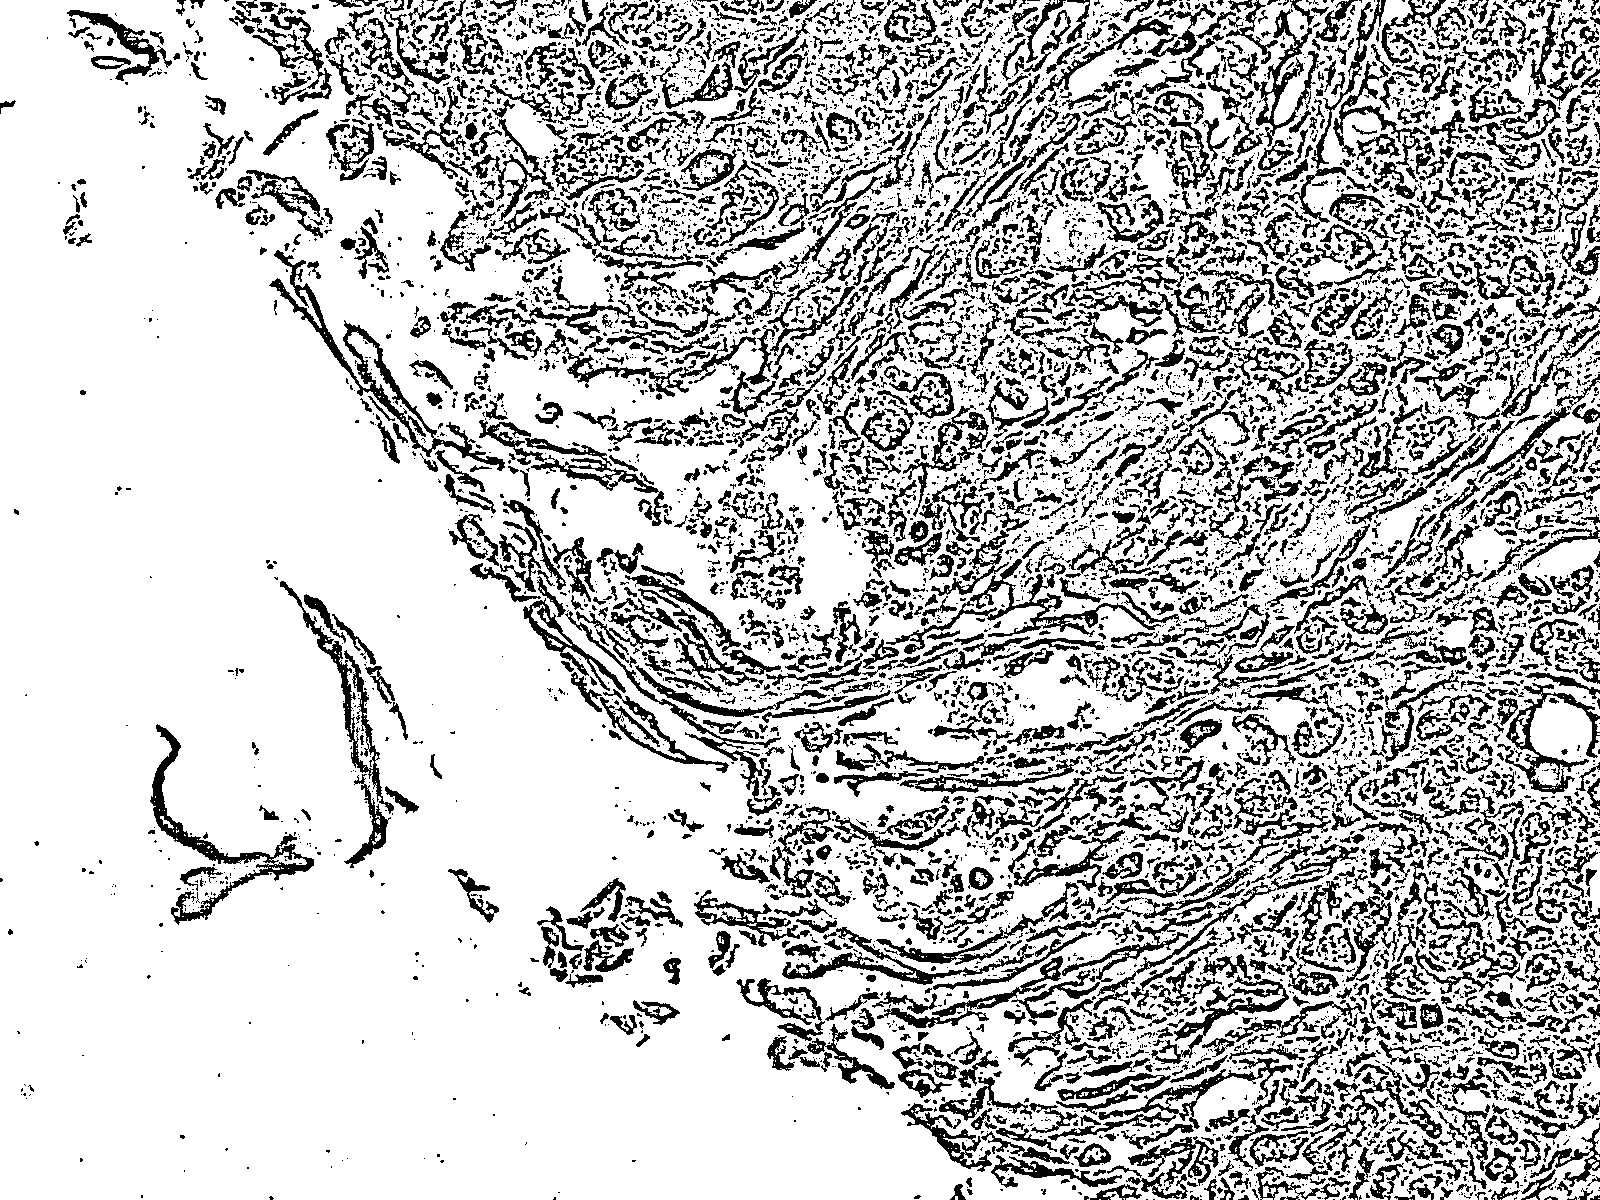

In [37]:
adp2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 9, 2)
im = showimage('teste2.jpg', adp2)
im

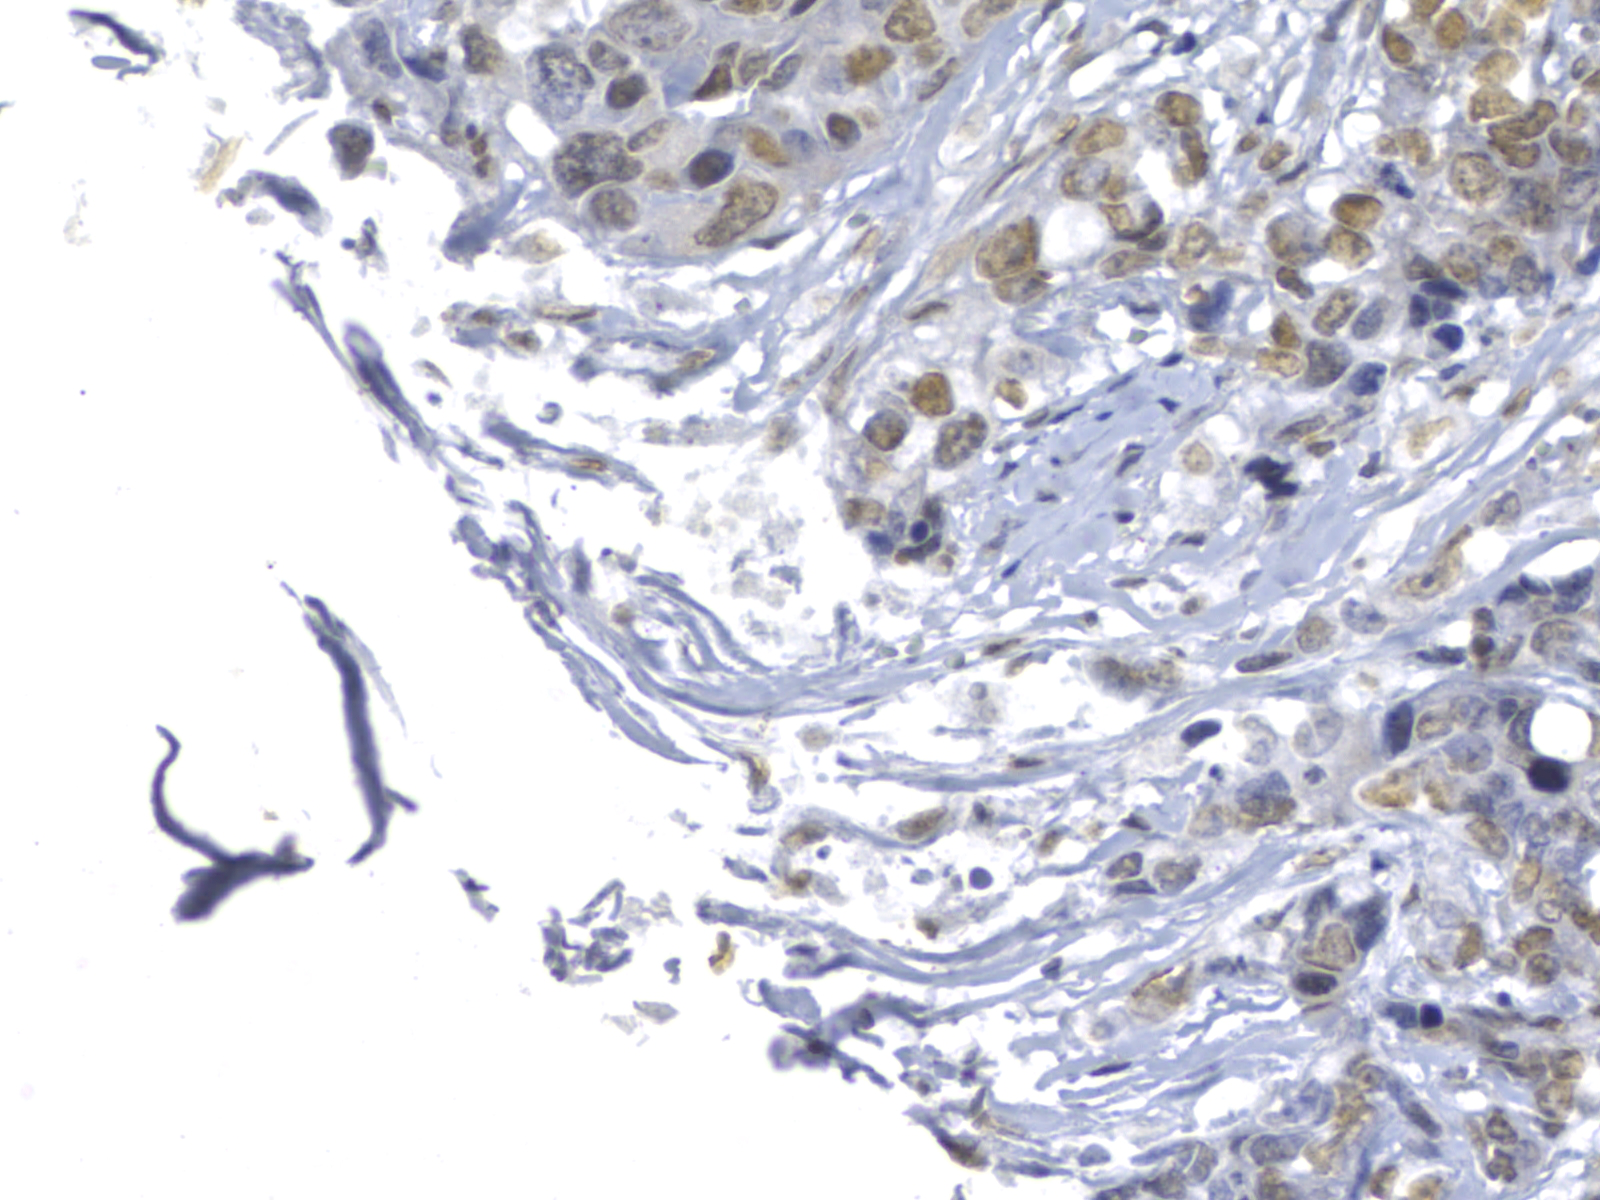

In [38]:
im = Image.open(img_path)
im

In [39]:
import os
os.remove('teste1.jpg')
os.remove('teste2.jpg')